# Introduction to network classsification with TensorFlow


## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles


# Make a 1000 examples 
n_samples = 10000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [2]:
# Check features
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [3]:
# Check the labels
y

array([1, 0, 0, ..., 1, 0, 1])

Our data is a little hard to understand rightr now let's visualize it! 

In [4]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


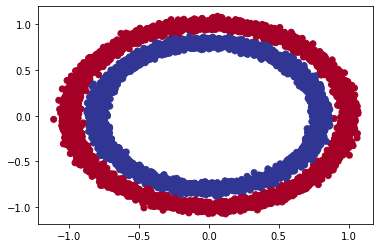

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
#circles.plot(kind='scatter', x='X0', y='X1', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(10000, 10000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.0464692 , 0.82477834]), 1)

 ## Steps with modelling

Remember the steps:
1. Get data ready
2. Build or pick a pretrained model
3. Fit the model to the data and make predictions
4. Evaluate the model

In [10]:
import tensorflow as tf
# Create model
tf.random.set_seed(42) 
circle_model = tf.keras.Sequential([
                                    tf.keras.Input(shape=(2, )),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
adam = tf.keras.optimizers.Adam()
cross_entropy = tf.keras.optimizers.Adam()
circle_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=adam,
                     metrics=['accuracy']
                     )

# Fit the model and save into variable
history = circle_model.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Test with custom input
import numpy as np
costum_input = np.array([0.5, 0.9])
costum_output = np.array([1])
circle_model.evaluate(X, y)


313/313 [==============================] - 1s 1ms/step - loss: 0.0193 - accuracy: 0.9991


[0.01929301582276821, 0.9991000294685364]

Text(0.5, 0, 'epochs')

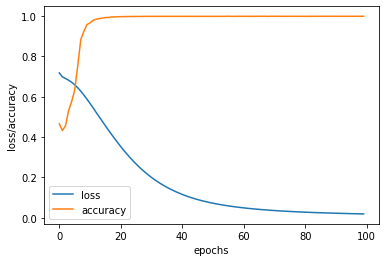

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss/accuracy')
plt.xlabel('epochs')

In [ ]:
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print(f'Doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print(f'Doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
x_in

array([[-1.20998605, -1.17555186],
       [-1.18597592, -1.17555186],
       [-1.16196578, -1.17555186],
       ...,
       [ 1.11899736,  1.18833628],
       [ 1.14300749,  1.18833628],
       [ 1.16701763,  1.18833628]])

Doing binary classification


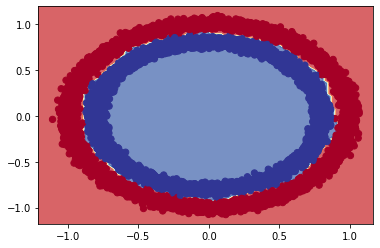

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=circle_model,
                       X=X,
                       y=y)
 

Useful resources:

https://cs231n.github.io/neural-networks-case-study/

https://madewithml.com/

In [ ]:
# Split it in training and test set

X_train, X_test = X[:9000, :], X[9000:, :]
y_train, y_test = y[:9000], y[9000:]
X_train.shape, X_test.shape

((9000, 2), (1000, 2))

In [ ]:
tf.random.set_seed(42)
circle_model_2 = tf.keras.Sequential([
                                      tf.keras.Input(shape=(2,)),
                                      tf.keras.layers.Dense(50, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=adam,
                       metrics=['accuracy'])

circle_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
circle_model_2.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000


[0.0031498342286795378, 1.0]

Doing binary classification


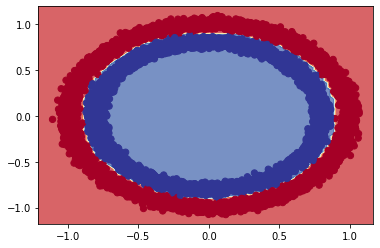

In [ ]:
plot_decision_boundary(model=circle_model_2,
                       X=X,
                       y=y)

In [ ]:
# Want to try another thing:
n_samples = 2000

X, y = make_circles(n_samples,
                    noise=0.02,
                    random_state=42)


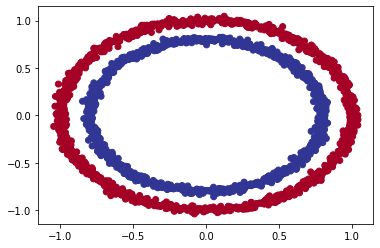

In [ ]:
sirkel = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'labels': y})

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X_train, X_test = X[:1800, :], X[1800:, :]
y_train, y_test = y[:1800], y[1800:]

In [ ]:
# The noisy model a<
tf.random.set_seed(42)

sirkel_model = tf.keras.Sequential([
                                    tf.keras.Input(shape=(2,)),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    #tf.keras.layers.Dense(12, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

sirkel_model.compile(loss='binary_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

sirkel_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 0.7399 - accuracy: 0.4978
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4761
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4711
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4728
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4778
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4517
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4233
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4211
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4311
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4100
Epoch 11/

In [ ]:
sirkel_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 1.0000


[0.39273756742477417, 1.0]

Doing binary classification
Doing binary classification


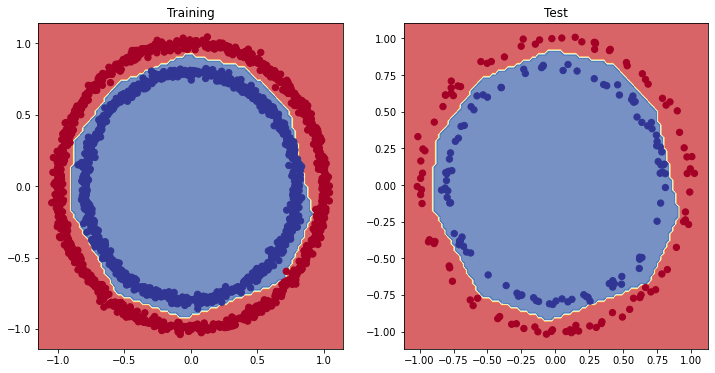

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Training')
plot_decision_boundary(sirkel_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(sirkel_model, X_test, y_test)

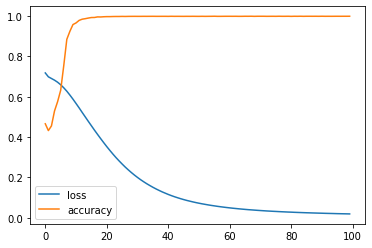

In [ ]:
pd.DataFrame(history.history).plot()

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
1. A learning rate **callback** - you can think callback yadayada E har alt prøvd ditte.
2. Another model (we could use the same one as above,, but we're practicing building models here)
3. A modified loss curves plot

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X_train, X_test = X[:800, :], X[800:, :]
y_train, y_test = y[:800], y[800:]

In [ ]:
tf.random.set_seed(42)

sirkel_model_2 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(4, activation='relu'),
                                      tf.keras.layers.Dense(4, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')                                
])

sirkel_model_2.compile(loss='binary_crossentropy',
                       optimizer='Adam',
                       metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = sirkel_model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

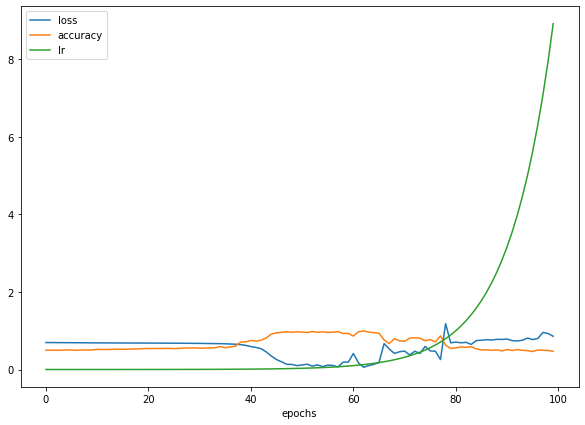

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs');


Text(0.5, 1.0, 'Learning vs loss')

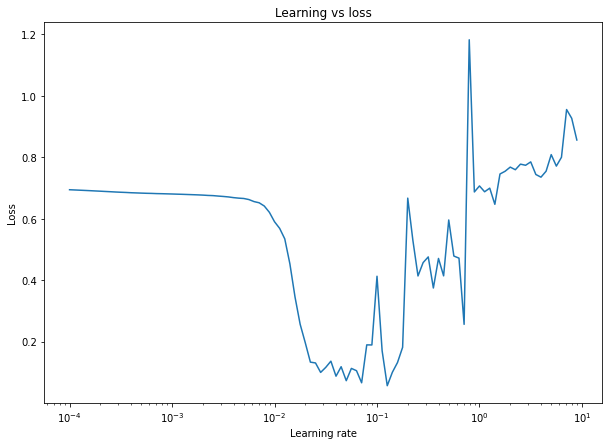

In [ ]:
# Plot learning rate vs loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning vs loss')

Ideal learning rate is at the lowest point where it is still decreasing in the plot over and usually a tenth of that size

In [ ]:
# Build a new model with the learning rate 0.02

tf.random.set_seed(42)

# Create the model
sirkel_model_3 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(4, activation='relu'),
                                      tf.keras.layers.Dense(4, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
sirkel_model_3.compile(loss='binary_crossentropy',
                       optimizer=tf.keras.optimizers.Adam(lr=0.02),
                       metrics=['accuracy'])

# Fit and train the model
history = sirkel_model_3.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


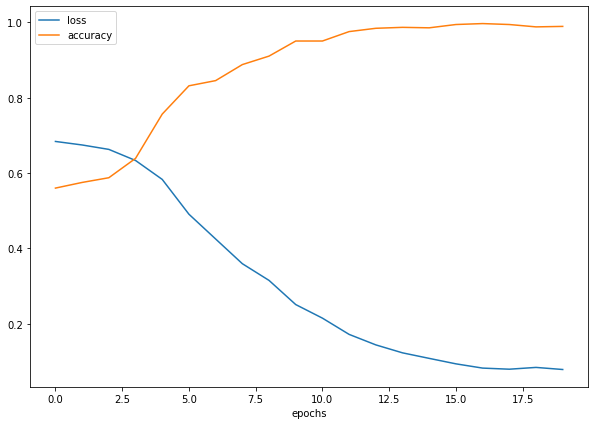

In [ ]:
sirkel_model_3.evaluate(X_test, y_test)
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs');

Doing binary classification
Doing binary classification


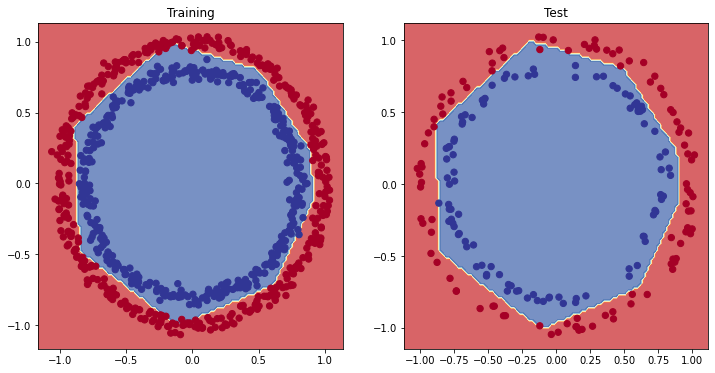

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Training')
plot_decision_boundary(sirkel_model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(sirkel_model_3, X_test, y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report sci-kit learn


In [ ]:
# Check the accuracy of our model
loss, accuracy = sirkel_model_3.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}\nModel accuracy on the test set: {accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 0.9900000095367432


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions 
y_pred = sirkel_model_3.predict(X_test)

# Confusion matrix
#confusion_matrix(y_test, y_pred)

In [ ]:
y_test[:10], y_pred[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[9.8526537e-01],
        [9.9923790e-01],
        [9.9032348e-01],
        [9.9706942e-01],
        [3.9622977e-01],
        [1.8126935e-02],
        [9.6829069e-01],
        [1.9746721e-02],
        [9.9967170e-01],
        [5.6460500e-04]], dtype=float32))

They are not the same. We should convert the pred values to 1 or 0, or categories

In [ ]:
y_pred = np.round(y_pred)
y_pred[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[99,  2],
       [ 0, 99]])

How to make this prettier

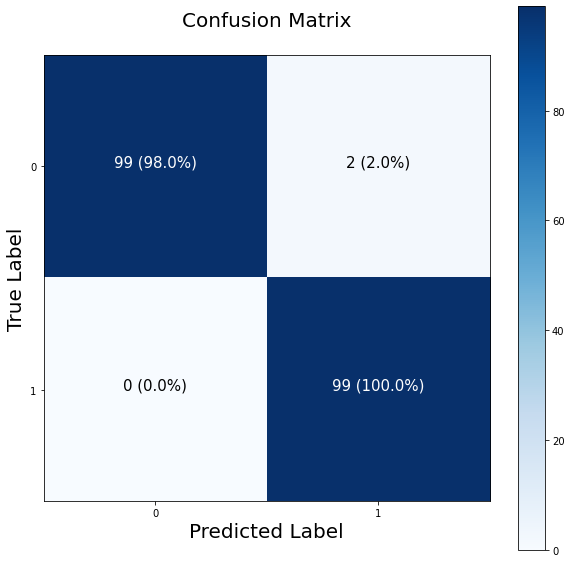

In [ ]:
# Not this is just stolen from sci-kit plot confusion matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set xaxis thingy
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

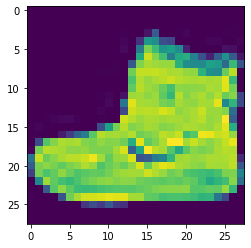

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

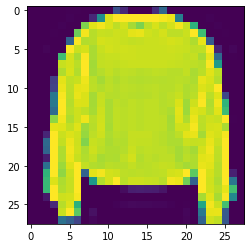

In [ ]:
plt.imshow(train_data[7]);

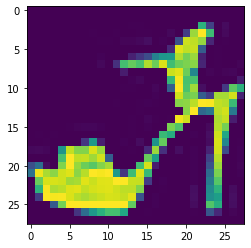

In [ ]:
plt.imshow(train_data[9]);

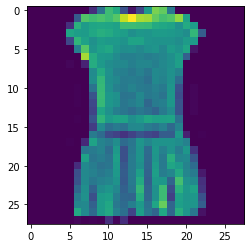

In [ ]:
plt.imshow(train_data[3]);

In [ ]:
# Creata a small list so we can index onto our training labels so they're human readable
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Trouser')

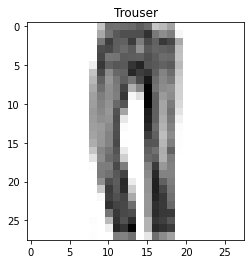

In [ ]:
# Plot an example image and its label
index_of_choice = 1500
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

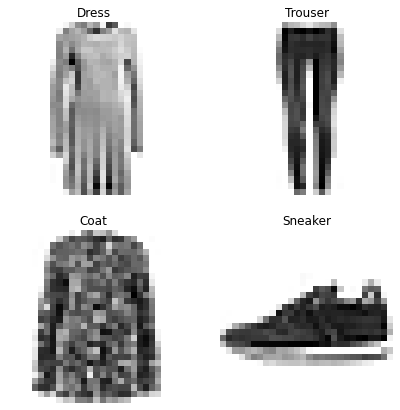

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification problem

For our multi-class classification model, we can use a similar architecture to our binary case
* Input shape = 28x28
* Output shape = 10 (one for each piece of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded use CategoricalCrossentropy()
  * If your labels are integers form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax

In [ ]:
train_labels_m = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_m = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
tf.random.set_seed(42)
# The data needs to be flattened because of we want a vector as an imput
# Create a model
multiclass_model = tf.keras.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28, 28)),
                                         tf.keras.layers.Dense(16, activation='relu'),
                                         #tf.keras.layers.Dense(4, activation='relu'),
                                         tf.keras.layers.Dense(10, activation='Softmax')
])
# You can use sparsecategoricalCrossentropy as a loss function instead of doing the to_categorical
# Compile the model
multiclass_model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

# Train the model
history = multiclass_model.fit(train_data, train_labels_m, epochs=25, validation_data=(test_data, test_labels_m))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3868 - accuracy: 0.1908 - val_loss: 1.9070 - val_accuracy: 0.2537
Epoch 2/25
1875/1875 [==============================] - 8s 5ms/step - loss: 1.6959 - accuracy: 0.2987 - val_loss: 1.5421 - val_accuracy: 0.3450
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4269 - accuracy: 0.4043 - val_loss: 1.3173 - val_accuracy: 0.4636
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2408 - accuracy: 0.4884 - val_loss: 1.1889 - val_accuracy: 0.5388
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1205 - accuracy: 0.5359 - val_loss: 1.1248 - val_accuracy: 0.5228
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0741 - accuracy: 0.5464 - val_loss: 1.0512 - val_accuracy: 0.5587
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0341 - accuracy: 0.5606 - val_loss: 1.0511 - val_accuracy:

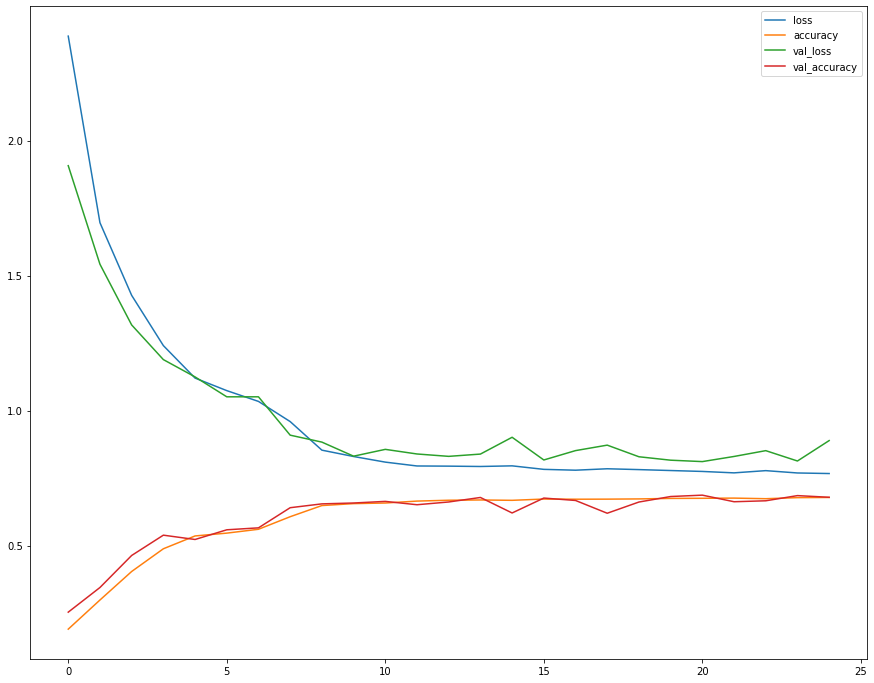

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15, 12))

In [ ]:
# Check the model summary
multiclass_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data

train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scalecd (or normalized), this means they like to have the number in the tensors they try to find patterns between 0 and 1

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max to assure you have normalized
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it
# Set random seed
tf.random.set_seed(42)

# Build model
multiclass_model2 = tf.keras.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28, 28)),
                                         tf.keras.layers.Dense(16, activation='relu'),
                                         tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
multiclass_model2.compile(loss='sparse_categorical_crossentropy',
                          optimizer='adam', 
                          metrics=['accuracy'])

history = multiclass_model2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6091 - accuracy: 0.7905 - val_loss: 0.4802 - val_accuracy: 0.8328
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.8472 - val_loss: 0.4854 - val_accuracy: 0.8299
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4111 - accuracy: 0.8559 - val_loss: 0.4496 - val_accuracy: 0.8409
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8632 - val_loss: 0.4460 - val_accuracy: 0.8403
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8652 - val_loss: 0.4487 - val_accuracy: 0.8425
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8674 - val_loss: 0.4417 - val_accuracy: 0.8447
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8679 - val_loss: 0.4449 - val_accuracy:

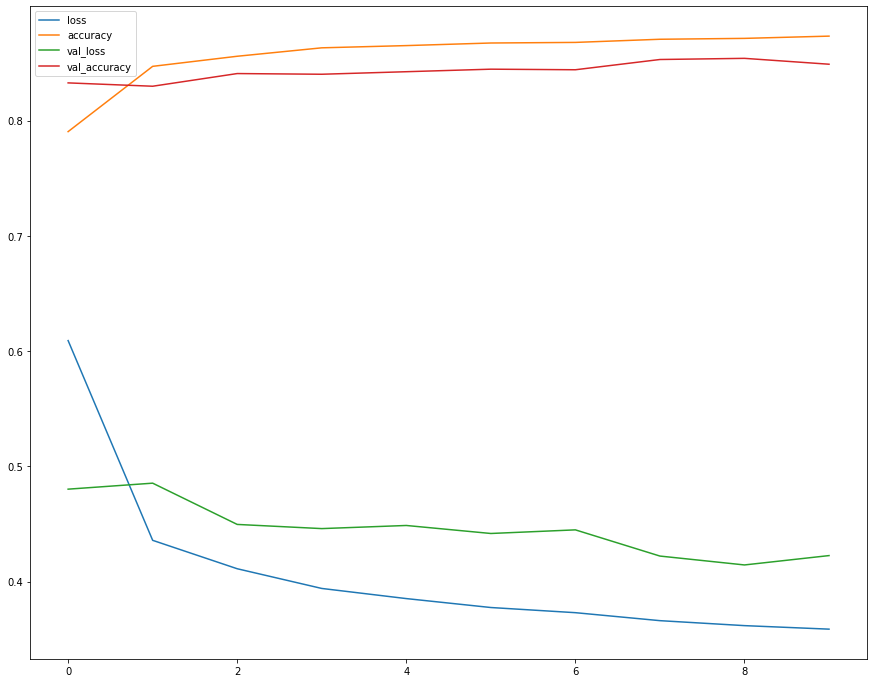

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15, 12))

## Finding the ideal realing rate

In [ ]:
tf.random.set_seed(42)

# Create a model
multiclass_model3 = tf.keras.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28, 28)),
                                         tf.keras.layers.Dense(16, activation='relu'),
                                         tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
multiclass_model3.compile(loss='sparse_categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Train the model
lr_history = multiclass_model3.fit(train_data_norm,
                      train_labels,
                      epochs=30,
                      validation_data=(test_data_norm, test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6091 - accuracy: 0.7905 - val_loss: 0.4802 - val_accuracy: 0.8328 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4372 - accuracy: 0.8463 - val_loss: 0.4813 - val_accuracy: 0.8324 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.8544 - val_loss: 0.4527 - val_accuracy: 0.8378 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3988 - accuracy: 0.8609 - val_loss: 0.4510 - val_accuracy: 0.8416 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3914 - accuracy: 0.8616 - val_loss: 0.4367 - val_accuracy: 0.8454 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3862 - accuracy: 0.8639 - val_loss: 0.4544 - val_accuracy: 0.8400 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

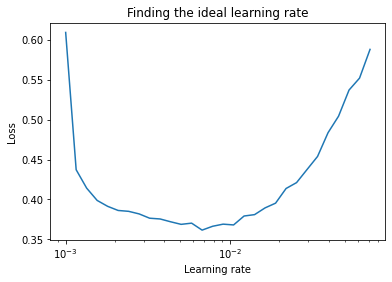

In [ ]:
lrs = 1e-3 * (19**(tf.range(30)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [ ]:
# Let us refit the model with the ideal learning rate:
history = multiclass_model3.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5695 - accuracy: 0.8184 - val_loss: 0.7357 - val_accuracy: 0.7691
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6267 - accuracy: 0.8033 - val_loss: 0.6424 - val_accuracy: 0.7959
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5846 - accuracy: 0.8215 - val_loss: 0.7002 - val_accuracy: 0.7795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5850 - accuracy: 0.8216 - val_loss: 0.7005 - val_accuracy: 0.8038
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6060 - accuracy: 0.7966 - val_loss: 0.7065 - val_accuracy: 0.7558
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.8159 - val_loss: 0.6230 - val_accuracy: 0.7883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6099 - accuracy: 0.8023 - val_loss: 0.6266 - val_accuracy:

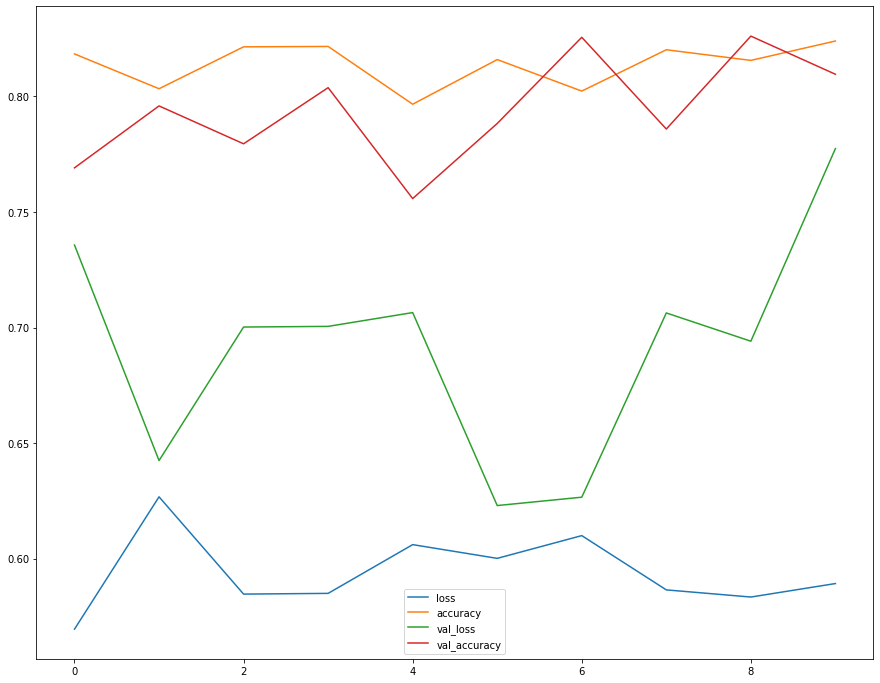

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15, 12))

## Evaluating our multi-class classification model

To evaluate our multi.-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size_axis=20, text_size=10):
  '''
  A function that creates a N class confusion matrix 
  '''

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set xaxis thingy
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size_axis)
  ax.xaxis.label.set_size(text_size_axis)
  ax.title.set_size(text_size_axis)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [ ]:
y_probs = multiclass_model3.predict(test_data_norm)
y_probs[0]

array([2.6091519e-30, 1.1759224e-19, 0.0000000e+00, 2.1012401e-04,
       0.0000000e+00, 1.1242185e-02, 0.0000000e+00, 2.3646508e-03,
       2.1391819e-17, 9.8618305e-01], dtype=float32)

In [ ]:
# Once again you get probability --> turn into integers
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 0, 1, 5])

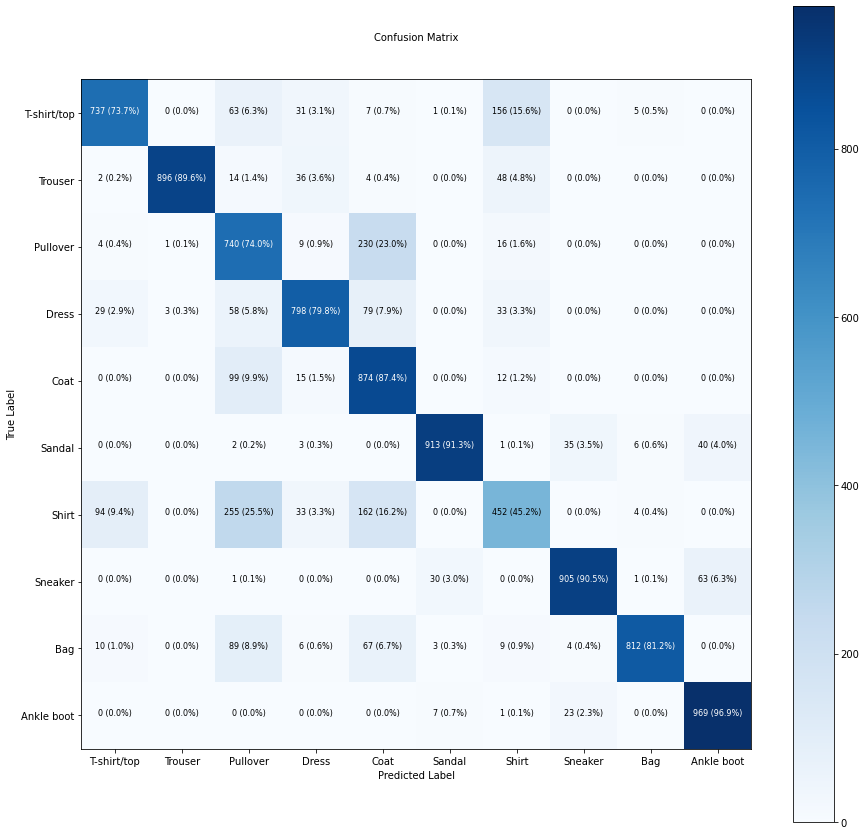

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size_axis=10,
                      text_size=8)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visalizze as much as possible to develop a further understanding of the data and the input and outputs of your models

How about we create a fun little function for 
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer 
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (predition/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong



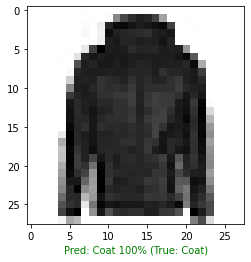

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(multiclass_model3, test_data_norm, test_labels, class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
multiclass_model3.layers

In [ ]:
# Extract a particular layer
multiclass_model3.layers[1]

In [ ]:
# Get the patterns of the layer in our network
weights, biases = multiclass_model3.layers[1].get_weights()
print(f'weights:\n{weights}\nshape: {weights.shape}')

weights:
[[-0.18518059  1.832585    0.7655713  ... -9.097081   10.396902
   0.0692272 ]
 [ 4.613456   -4.7712975  -0.1202383  ...  4.555314    8.930846
  -0.04546184]
 [ 5.9221754   1.5344164  -1.0864847  ...  8.719418    0.42692304
  -0.05809005]
 ...
 [-1.6118282   1.9241178  -3.9313028  ...  3.7302418   0.05361022
  -0.02843487]
 [-0.8609652   9.714443   11.113841   ... -2.269354    5.2167406
   0.05754487]
 [ 1.969267    1.1797563   0.33310708 ...  9.320671    6.1921163
   0.06777737]]
shape: (784, 16)


Now lets check out the bias vector...

In [ ]:
# Bias and bias shape:
biases, biases.shape

(array([ -0.04383487, -10.778029  ,  -5.24177   ,  -9.941406  ,
         -5.1462116 ,   9.1278925 ,   2.755268  ,   4.7730474 ,
        -15.599877  ,  11.311931  ,  -1.0431154 ,  14.273483  ,
         -2.9158263 ,   7.5578547 ,   7.5720587 ,  -0.02783258],
       dtype=float32), (16,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.
The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).
The bias vector dictates how much of the patterns within the corresponding weights matrix should influence the next layer.

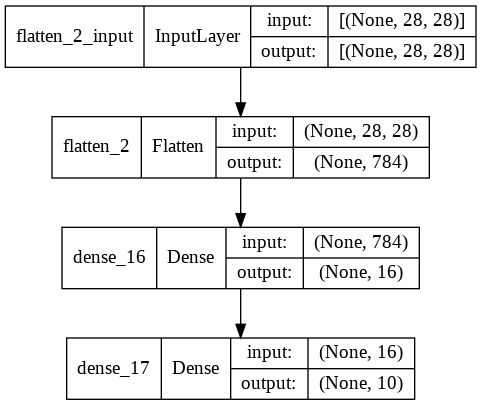

In [ ]:
# Let's check out another way of viewing our model:
from tensorflow.keras.utils import plot_model
plot_model(multiclass_model3, show_shapes=True)

## Exercises from github

In [ ]:
# Exercises and extra curriculum...
import tensorflow as tf
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
n_samples = 1000

X, y = make_moons(n_samples, noise=0.03, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

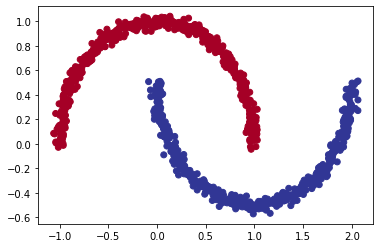

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()
X_train_norm.shape

(800, 2)

In [ ]:
ex_model = tf.keras.Sequential([
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

ex_model.compile(loss='binary_crossentropy', 
                 optimizer='adam',
                 metrics=['accuracy'])

history = ex_model.fit(X_train_norm, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5225
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7212
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.8012
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.8012
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8462
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.8625
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8775
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8775
Epoch 11/

In [ ]:
ex_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 6)                   18        
                                                                 
 dense_1 (Dense)             (32, 6)                   42        
                                                                 
 dense_2 (Dense)             (32, 6)                   42        
                                                                 
 dense_3 (Dense)             (32, 6)                   42        
                                                                 
 dense_4 (Dense)             (32, 6)                   42        
                                                                 
 dense_5 (Dense)             (32, 1)                   7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

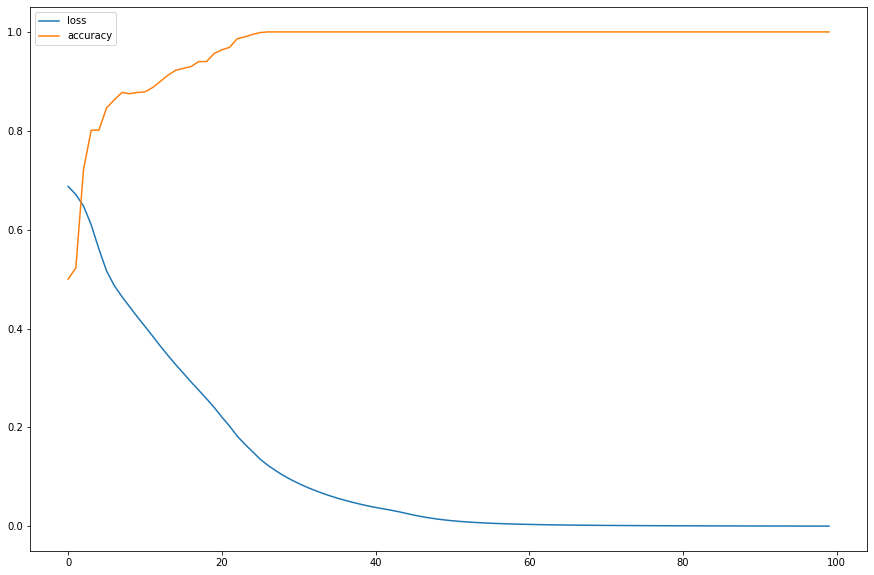

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15, 10))

In [ ]:
# Part 2: do mnist for clothes again with 88%+ accuracy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_img[0, 16, 24]

233

In [ ]:
train_img.max()

255

In [ ]:
train_img_norm = train_img / train_img.max()
test_img_norm = test_img / test_img.max()
test_img_norm.max()

1.0

In [ ]:
train_labels_cat = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
textile_model = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28, 28)),
                                     tf.keras.layers.Dense(16, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
])

textile_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

textile_model.fit(train_img_norm, train_labels_cat, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5904 - accuracy: 0.7932
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4269 - accuracy: 0.8484
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3979 - accuracy: 0.8576
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8630
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3695 - accuracy: 0.8682
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3609 - accuracy: 0.8706
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3535 - accuracy: 0.8735
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3465 - accuracy: 0.8753
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8774
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.335

In [ ]:
textile_model.evaluate(test_img_norm, test_labels_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.3926 - accuracy: 0.8638


[0.392567902803421, 0.8637999892234802]

In [ ]:
from sklearn.metrics import confusion_matrix

# Make prediction
y_pred = textile_model.predict(test_img_norm)
y_pred.shape
y_pred = np.argmax(y_pred, axis=1)


In [ ]:
con = confusion_matrix(test_labels, y_pred)
con

array([[848,   1,  16,  53,   5,   2,  67,   0,   8,   0],
       [  3, 962,   1,  27,   3,   0,   4,   0,   0,   0],
       [ 19,   5, 775,  18, 132,   0,  50,   0,   1,   0],
       [ 21,   8,  13, 909,  24,   2,  20,   0,   3,   0],
       [  0,   1, 100,  52, 807,   0,  40,   0,   0,   0],
       [  0,   0,   0,   1,   0, 957,   0,  25,   2,  15],
       [181,   3, 117,  45, 103,   1, 533,   0,  17,   0],
       [  0,   0,   0,   0,   0,  26,   0, 963,   0,  11],
       [  4,   2,   2,   7,   7,   8,  10,   6, 953,   1],
       [  0,   0,   0,   0,   0,   9,   2,  57,   1, 931]])

# Exersise 3

In [ ]:
# Softmax function:

def my_softmax(a):
  return np.exp(a) / np.sum(np.exp(a))



# Exercise 4

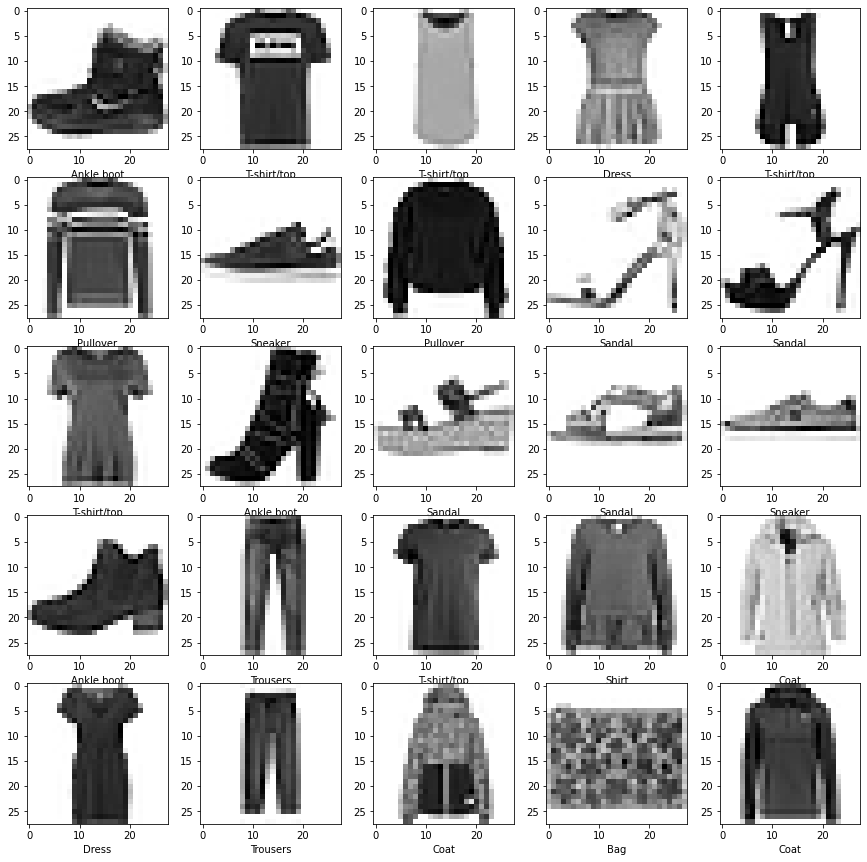

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks()
  plt.yticks()
  plt.grid(False)
  plt.imshow(train_img_norm[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()